In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
img = cv2.imread("./img/jpeg/im1.jpeg")

In [3]:
# downscale image
times = 8
img = cv2.resize(img, (img.shape[1]//times, img.shape[0]//times))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

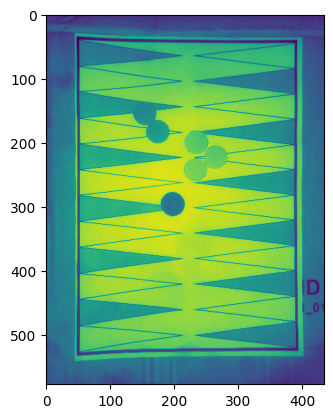

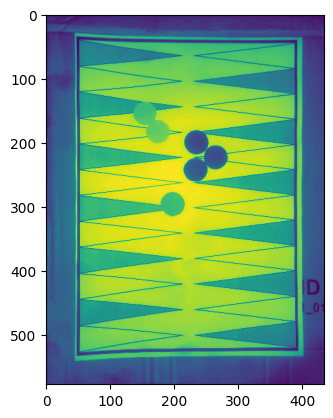

In [4]:
b, g, r = cv2.split(img)
# show the red and green channels
plt.figure()
plt.imshow(r)
plt.figure()
plt.imshow(g)

In [14]:
# subtract the green channel from the red channel
result = np.zeros((g.shape[0], g.shape[1]), dtype='uint8')
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        val1 = r[i][j].astype('int8')
        val2 = g[i][j].astype('int8')
        res = val1 - val2
        # make sure the value is not negative
        if res < 0:
            result[i][j] = 0
        else:
            result[i][j] = res

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7360\1733480607.py:7: RuntimeWarning: overflow encountered in scalar subtract
  res = val1 - val2


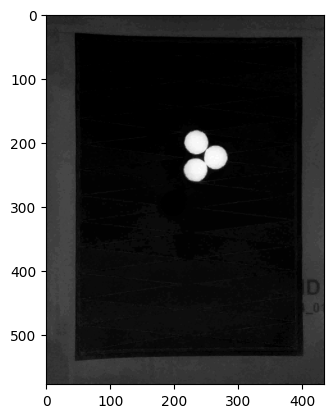

In [15]:
plt.imshow(result, cmap="gray")

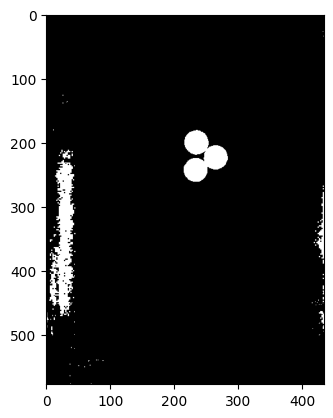

In [16]:
thresholded = cv2.threshold(result, 23, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresholded, cmap="gray")

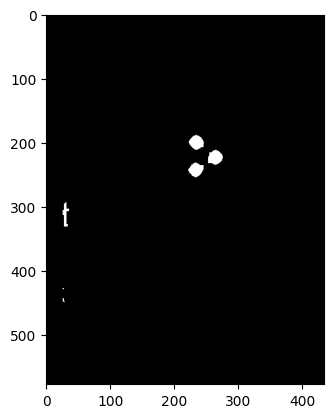

In [17]:
# erode the image
eroded = cv2.erode(thresholded, None, iterations=6)
plt.imshow(eroded, cmap="gray")

In [18]:
# gray_image = cv2.cvtColor(thresholded_image_after, cv2.COLOR_BGR2GRAY)
# _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
# filter the contours by area
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) > 250
]
filtered_contours

[array([[[232, 232]],
 
        [[231, 233]],
 
        [[230, 233]],
 
        [[228, 235]],
 
        [[227, 235]],
 
        [[227, 236]],
 
        [[225, 238]],
 
        [[225, 239]],
 
        [[222, 242]],
 
        [[222, 244]],
 
        [[223, 245]],
 
        [[223, 246]],
 
        [[224, 247]],
 
        [[224, 248]],
 
        [[225, 248]],
 
        [[227, 250]],
 
        [[227, 251]],
 
        [[228, 252]],
 
        [[229, 252]],
 
        [[230, 253]],
 
        [[231, 253]],
 
        [[232, 254]],
 
        [[235, 254]],
 
        [[237, 252]],
 
        [[238, 252]],
 
        [[242, 248]],
 
        [[242, 247]],
 
        [[243, 246]],
 
        [[243, 245]],
 
        [[244, 244]],
 
        [[244, 243]],
 
        [[245, 242]],
 
        [[245, 236]],
 
        [[240, 236]],
 
        [[238, 234]],
 
        [[237, 234]],
 
        [[236, 233]],
 
        [[235, 233]],
 
        [[234, 232]]], dtype=int32),
 array([[[264, 212]],
 
        [[263, 213]],
 
   

In [20]:
# get the center of each contour and save it in a list
centers = []
for contour in filtered_contours:
    moments = cv2.moments(contour)
    center = (
        int(moments["m10"] / moments["m00"]),
        int(moments["m01"] / moments["m00"]),
    )
    centers.append(center)

centers

[(233, 242), (263, 223), (234, 200)]

In [21]:
# print the area of the contours
# calculate and print the area of each contour
for contour in filtered_contours:
    area = cv2.contourArea(contour)
    print(f"Area: {area}")

Area: 342.0
Area: 365.5
Area: 352.0


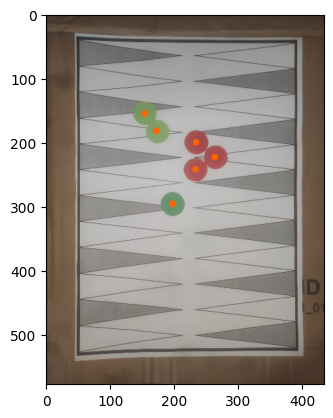

In [22]:
# draw points for each center
for center in centers:
    cv2.circle(img_rgb, center, 5, (255, 100, 0), -1)

plt.imshow(img_rgb)